<a href="https://colab.research.google.com/github/SANSKARJ14/01_July_OOPs_assingment/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_excel('/content/online_retail_II.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [7]:
description_missing = df['Description'].isnull().sum() / len(df) * 100
print(f"Percentage of missing Description: {description_missing:.2f}%")


Percentage of missing Description: 0.56%


In [8]:
df['Description'] = df['Description'].fillna('Unknown')

In [9]:
customerid_missing = df['Customer ID'].isnull().sum() / len(df) * 100
print(f"Percentage of missing Customer ID: {customerid_missing:.2f}%")


Percentage of missing Customer ID: 20.54%


In [10]:
df['Missing_CustomerID'] = df['Customer ID'].isnull().astype(int)
# it creates new column and true is 1 and false is 0

In [11]:
df['Customer ID'] = df['Customer ID'].fillna(-1)

In [12]:
#Data Type Conversions

# Convert 'Invoice' and 'StockCode' to categorical
df['Invoice'] = df['Invoice'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')

# Ensure 'Price' and 'Quantity' are numerical
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
# errors = "coerce" means that when any datapoint cannot be coverted into numeric then replace with NAN

In [13]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Invoice             525461 non-null  category      
 1   StockCode           525461 non-null  category      
 2   Description         525461 non-null  object        
 3   Quantity            525461 non-null  int64         
 4   InvoiceDate         525461 non-null  datetime64[ns]
 5   Price               525461 non-null  float64       
 6   Customer ID         525461 non-null  float64       
 7   Country             525461 non-null  object        
 8   Missing_CustomerID  525461 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 31.5+ MB
None
Invoice               0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
Price                 0
Customer ID        

In [14]:
#Handling Duplicates

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 6865


In [15]:
if duplicate_count > 0:
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows.")


Removed 6865 duplicate rows.


In [16]:
invoice_duplicates = df[df.duplicated(subset=['Invoice', 'StockCode', 'Quantity'], keep=False)]

In [17]:
#2.4 Handling Negative Quantities and Prices
# Check for negative quantities and prices
neg_quantity = df[df['Quantity'] < 0]
neg_price = df[df['Price'] < 0]

In [18]:
print(f"Number of negative quantities: {len(neg_quantity)}")
print(f"Number of negative prices: {len(neg_price)}")

Number of negative quantities: 12302
Number of negative prices: 3


In [19]:
# Investigate negative values
print("\\nSample of negative quantities:")
print(neg_quantity.head())

\nSample of negative quantities:
     Invoice StockCode                    Description  Quantity  \
178  C489449     22087       PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896             POTTING SHED TWINE        -6   
182  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

            InvoiceDate  Price  Customer ID    Country  Missing_CustomerID  
178 2009-12-01 10:33:00   2.95      16321.0  Australia                   0  
179 2009-12-01 10:33:00   1.65      16321.0  Australia                   0  
180 2009-12-01 10:33:00   4.25      16321.0  Australia                   0  
181 2009-12-01 10:33:00   2.10      16321.0  Australia                   0  
182 2009-12-01 10:33:00   2.95      16321.0  Australia                   0  


In [20]:
print("\\nSample of negative prices:")
print(neg_price.head())


\nSample of negative prices:
        Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

           Price  Customer ID         Country  Missing_CustomerID  
179403 -53594.36         -1.0  United Kingdom                   1  
276274 -44031.79         -1.0  United Kingdom                   1  
403472 -38925.87         -1.0  United Kingdom                   1  


In [21]:
# Decision: Negative quantities might represent returns.
# We'll keep them for now but flag them for the analysis.
df['Is_Return'] = (df['Quantity'] < 0).astype(int)


In [22]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Missing_CustomerID,Is_Return
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,0
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,0


In [23]:
# After investigating negative prices we findout there are 3 price negative entries and those are adjustment entries.
# If they're data errors, we might want to remove them:
#

In [24]:
#Outlier Detection and Handling

In [25]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


In [26]:
quantity_outliers = detect_outliers(df, 'Quantity')
price_outliers = detect_outliers(df, 'Price')

In [27]:
print(f"Number of Quantity outliers: {len(quantity_outliers)}")
print(f"Number of Price outliers: {len(price_outliers)}")

Number of Quantity outliers: 57744
Number of Price outliers: 35078


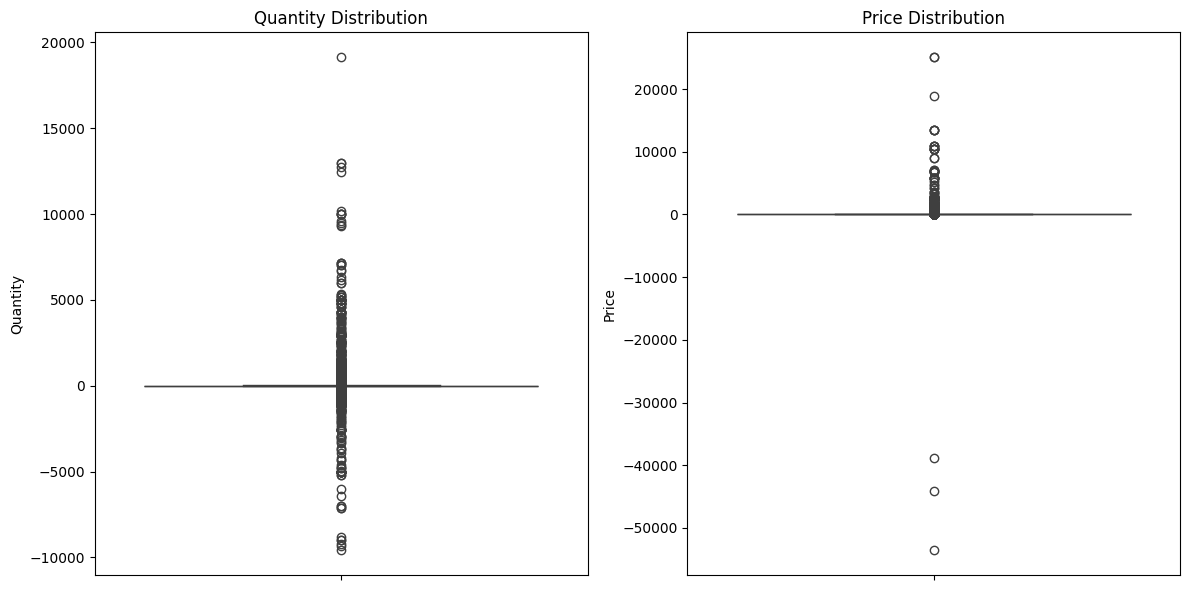

In [28]:
# Visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.boxplot(y=df['Quantity'])
plt.title('Quantity Distribution')
plt.subplot(122)
sns.boxplot(y=df['Price'])
plt.title('Price Distribution')
plt.tight_layout()
plt.show()

In [29]:
# Decision: Instead of removing outliers, let's cap them
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [30]:
df = cap_outliers(df, 'Quantity')
df = cap_outliers(df, 'Price')

print("Outliers have been capped.")

Outliers have been capped.


In [31]:
#3. Feature Engineering

In [32]:
#3.1 RFM Features
# Set the analysis date as the day after the last invoice date
analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [33]:
# Group by Customer ID
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency
    'Price': lambda x: (x * df.loc[x.index, 'Quantity']).sum()  # Monetary
})

In [34]:
# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [35]:
# Remove any negative monetary values (if any)
rfm = rfm[rfm['Monetary'] > 0]


In [36]:
print(rfm.head())


             Recency  Frequency    Monetary
Customer ID                                
-1.0               1     107833  867596.785
 12346.0          67         45     252.570
 12347.0           3         71    1289.750
 12348.0          74         20     219.640
 12349.0          43        107    2023.250


In [37]:
# Average Order Value
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']


In [38]:
# Days Since First Purchase
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min()
rfm['Days_Since_First_Purchase'] = (analysis_date - first_purchase).dt.days


In [39]:
def purchase_regularity(customer_invoices):
    if len(customer_invoices) < 2:
        return 0

    # Convert the sorted invoice dates to a list of datetime objects
    invoice_dates = pd.to_datetime(sorted(customer_invoices)).tolist()

    # Calculate the differences between consecutive invoice dates
    date_diffs = [(date2 - date1).days for date1, date2 in zip(invoice_dates[:-1], invoice_dates[1:])]

    # Calculate the standard deviation of the date differences
    return np.std(date_diffs)

In [40]:
regularity = df.groupby('Customer ID')['InvoiceDate'].apply(purchase_regularity)

In [41]:
rfm['Purchase_Regularity'] = regularity

In [42]:
# Favorite Product Category
def favorite_category(customer_purchases):
    return customer_purchases['StockCode'].value_counts().index[0]


In [43]:
favorite_categories = df.groupby('Customer ID').apply(favorite_category)


In [44]:
rfm['Favorite_Category'] = favorite_categories


In [79]:
rfm

,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity,Favorite_Category
Customer ID,,,,,,,
-1.0,1,107833,867596.785,8.045745,374,0.049378,DOT
12346.0,67,45,252.570,5.612667,361,22.689059,M
12347.0,3,71,1289.750,18.165493,40,4.390644,84558A
12348.0,74,20,219.640,10.982000,74,0.000000,21213
12349.0,43,107,2023.250,18.908879,371,21.030390,21232
...,...,...,...,...,...,...,...
18283.0,18,217,608.770,2.805392,294,11.756393,20727
18284.0,65,29,354.940,12.239310,67,0.371154,C2
18285.0,296,12,228.975,19.081250,296,0.000000,22178


In [96]:
negative_recency = rfm['Recency'] < 0

In [98]:
negative_recency.sum()

0

In [45]:
#3.3 Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [47]:
features_to_scale = ['Recency', 'Frequency', 'Monetary', 'AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity']

In [100]:
scaler = MinMaxScaler()


In [101]:
# Fit and transform the selected features
rfm_scaled = rfm.copy()
rfm_scaled[features_to_scale] = scaler.fit_transform(rfm[features_to_scale])


In [102]:
#3.4 Handling Categorical Variables

# One-hot encode the Favorite_Category
rfm_encoded = pd.get_dummies(rfm_scaled, columns=['Favorite_Category'], prefix='Cat')

In [103]:
#4. Final Data Preparation

# Drop any remaining null values
rfm_final = rfm_encoded.dropna()

In [104]:
# Reset index to make Customer ID a column
rfm_final = rfm_final.reset_index()

In [105]:
# Save the prepared dataset
rfm_final.to_csv('rfm_prepared.csv', index=False)

In [54]:
print("Data cleaning and feature engineering complete. Final dataset shape:", rfm_final.shape)

Data cleaning and feature engineering complete. Final dataset shape: (4292, 1339)


In [106]:
rfm_final.head()

,Customer ID,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity,Cat_10002,Cat_10125,Cat_15030,...,Cat_90197D,Cat_90211B,Cat_ADJUST,Cat_C2,Cat_D,Cat_DOT,Cat_M,Cat_PADS,Cat_POST,Cat_TEST001
0,-1.0,0.000000,1.000000,1.000000,0.039581,1.000000,0.000311,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,12346.0,0.176944,0.000408,0.000291,0.027611,0.965147,0.142821,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,12347.0,0.005362,0.000649,0.001487,0.089364,0.104558,0.027638,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12348.0,0.195710,0.000176,0.000253,0.054025,0.195710,0.000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12349.0,0.112601,0.000983,0.002332,0.093021,0.991957,0.132380,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [107]:
2# Comprehensive RFM Analysis, Clustering, and Visualization

2

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [109]:
# Set styling for matplotlib
plt.style.use('seaborn')
sns.set_palette("deep")

# Load the prepared data
rfm_df = pd.read_csv('rfm_prepared.csv')


<ipython-input-109-46bfc6655be4>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



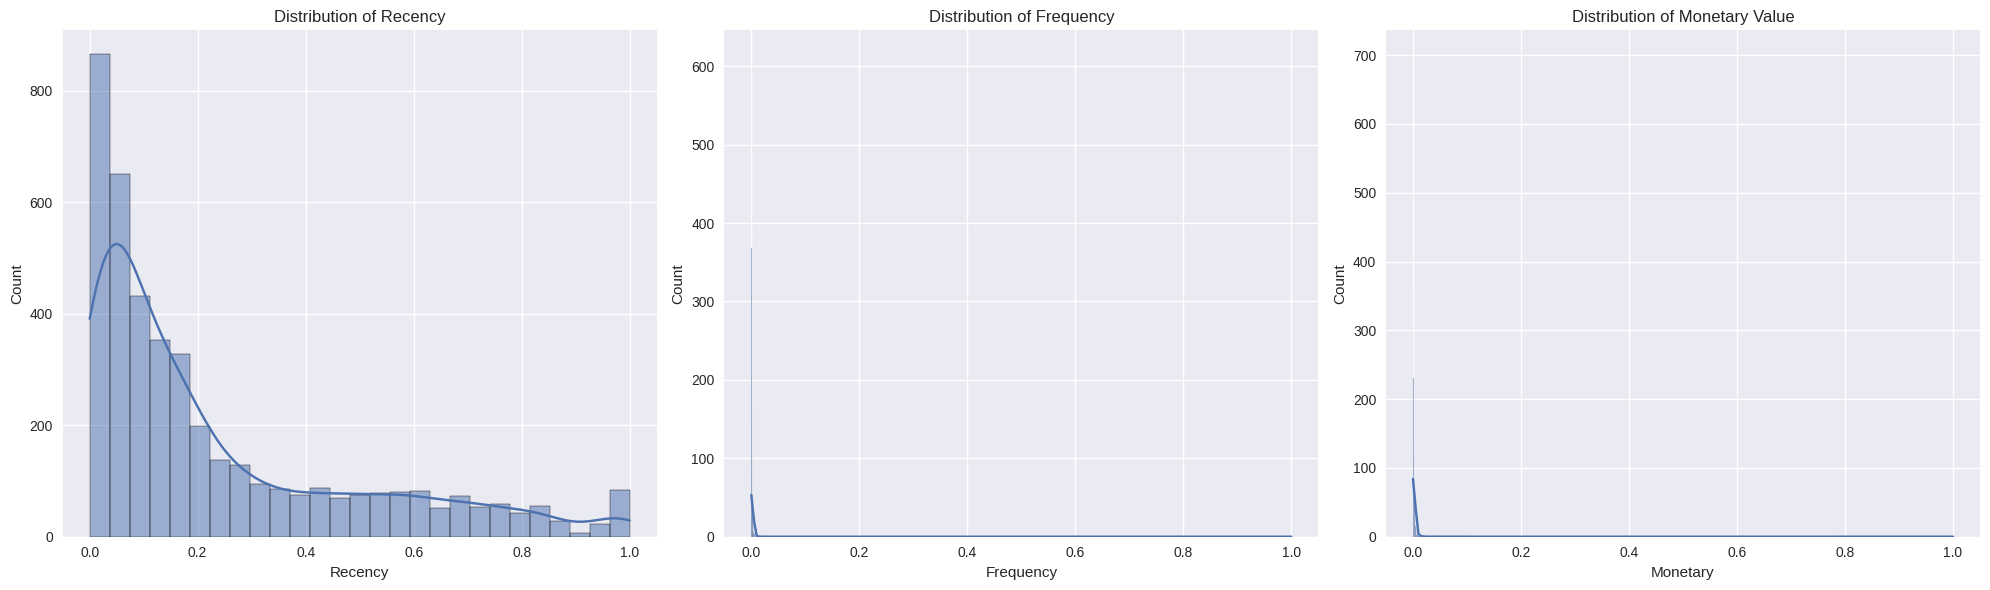

In [110]:
#2. Exploratory Data Analysis (EDA)
#2.1 Distribution of RFM Values


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data=rfm_df, x='Recency', kde=True, ax=axes[0])
sns.histplot(data=rfm_df, x='Frequency', kde=True, ax=axes[1])
sns.histplot(data=rfm_df, x='Monetary', kde=True, ax=axes[2])
axes[0].set_title('Distribution of Recency')
axes[1].set_title('Distribution of Frequency')
axes[2].set_title('Distribution of Monetary Value')
plt.tight_layout()
plt.show()


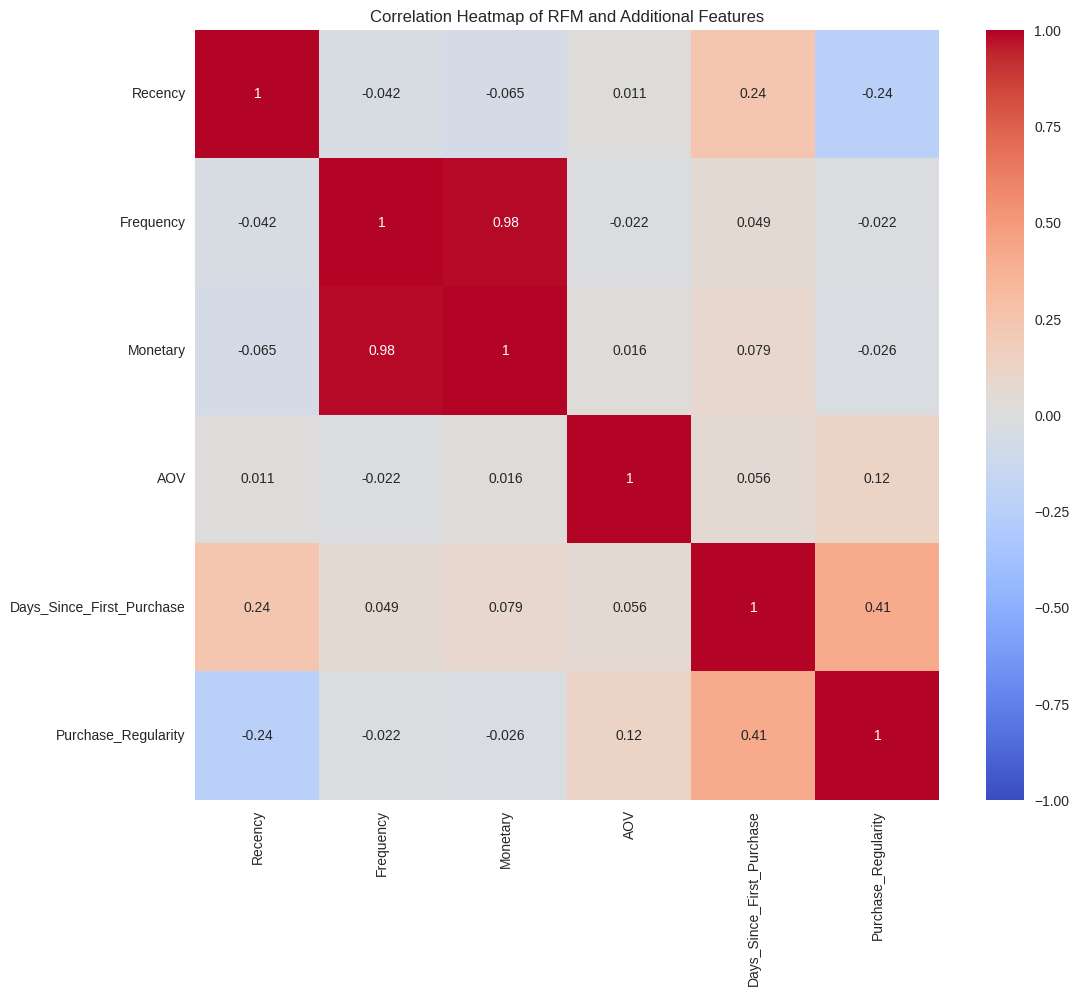

In [111]:
#2.2 Correlation Analysis
corr_matrix = rfm_df[['Recency', 'Frequency', 'Monetary', 'AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of RFM and Additional Features')
plt.show()

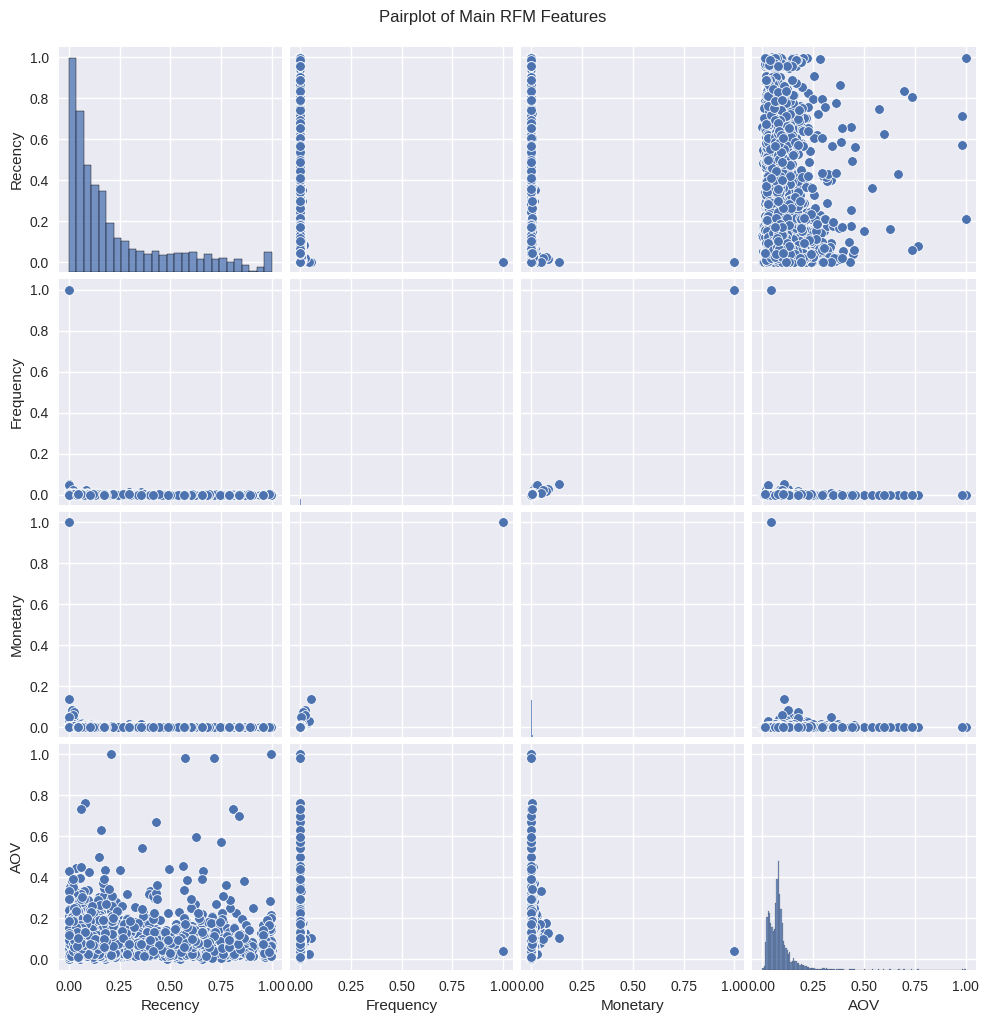

In [112]:
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary', 'AOV']])
plt.suptitle('Pairplot of Main RFM Features', y=1.02)
plt.show()

In [113]:
#3. K-means Clustering
#3.1 Determine Optimal Number of Clusters

In [114]:
def optimal_k(data, max_k):
    iters = range(2, max_k+1, 1)
    sse = []
    silhouette_scores = []

    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    return iters, sse, silhouette_scores


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

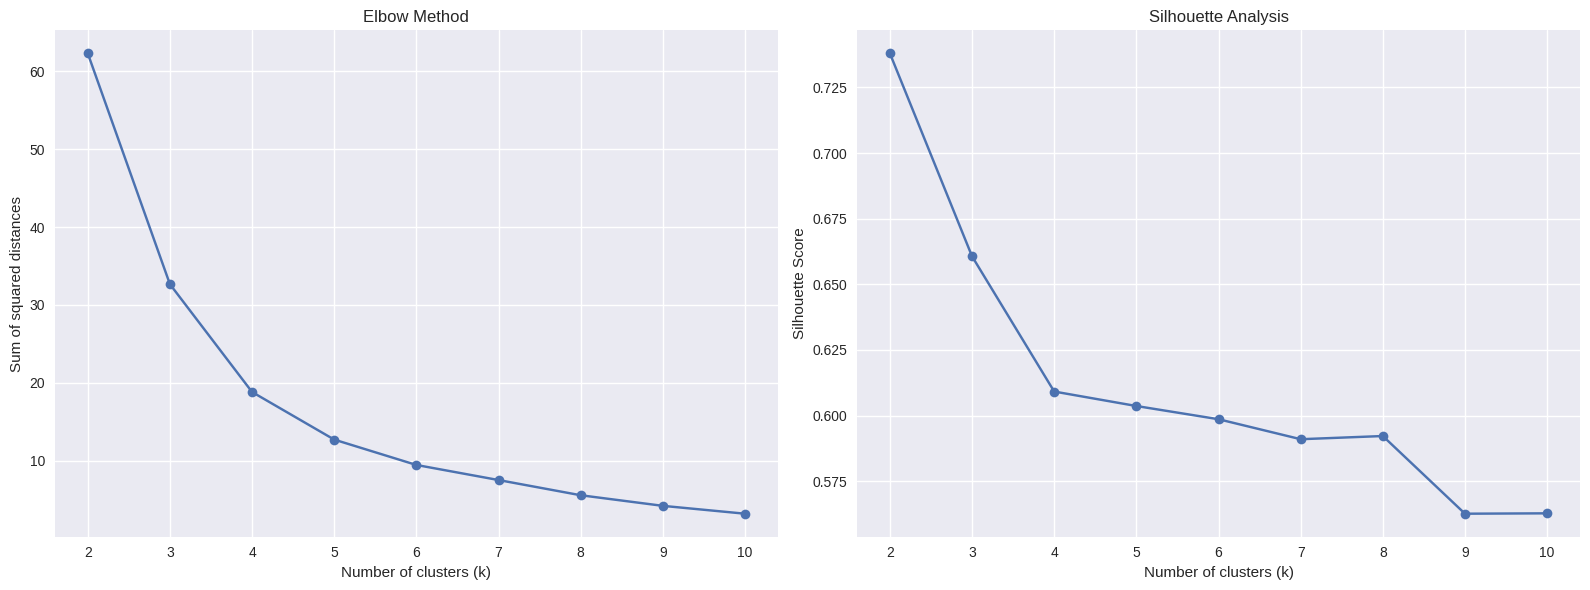

In [115]:
features = ['Recency', 'Frequency', 'Monetary']
iters, sse, silhouette_scores = optimal_k(rfm_df[features], 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(iters, sse, marker='o')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Sum of squared distances')
ax1.set_title('Elbow Method')

ax2.plot(iters, silhouette_scores, marker='o')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')

plt.tight_layout()
plt.show()


In [118]:
#3.2 Perform K-means Clustering

# Based on the elbow method and silhouette analysis, choose the optimal k
optimal_k = 4  # This should be determined from the plots above

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [119]:
## 4. Cluster Analysis and Visualization

### 4.1 3D Scatter Plot of Clusters

fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary', color='Cluster',
                    labels={'Cluster': 'Cluster'},
                    title='3D Scatter Plot of RFM Clusters')
fig.show()


In [120]:
#4.2 Parallel Coordinates Plot

fig = px.parallel_coordinates(rfm_df, color="Cluster",
                              dimensions=['Recency', 'Frequency', 'Monetary', 'AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Coordinates Plot of Customer Segments')
fig.show()

In [121]:
#4.3 Cluster Centroids

In [122]:
centroids = rfm_df.groupby('Cluster')[features].mean()

centroids

,Recency,Frequency,Monetary
Cluster,,,
0,0.206280,0.000587,0.001068
1,0.813621,0.000205,0.000333
2,0.499249,0.000352,0.000607
3,0.048494,0.001810,0.002920


In [123]:
# Radar Chart of Cluster Centroids
fig = go.Figure()

for i in range(optimal_k):
    fig.add_trace(go.Scatterpolar(
        r=centroids.iloc[i].values,
        theta=features,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title='Radar Chart of Cluster Centroids'
)

fig.show()


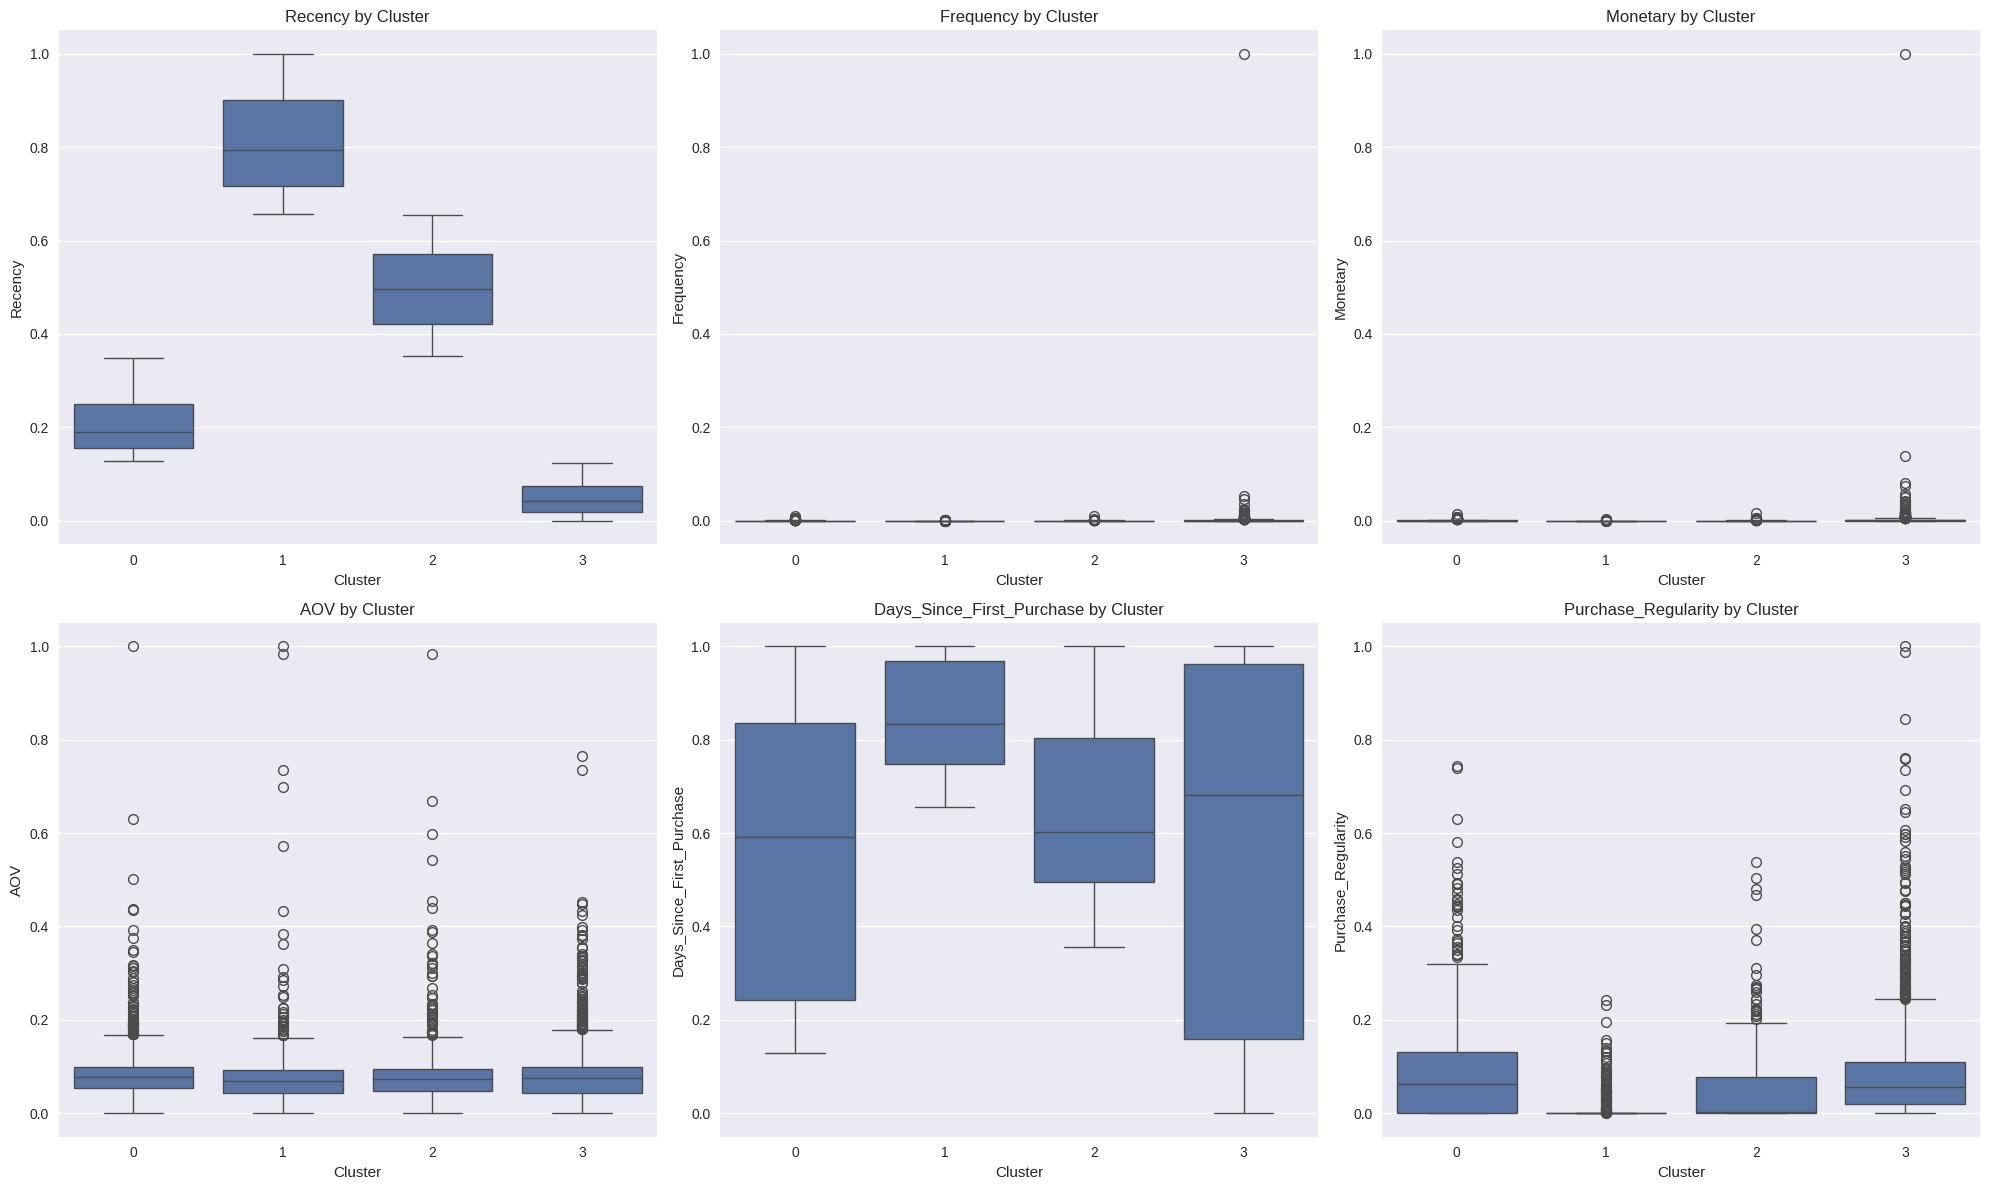

In [124]:
# 4.4 Box Plots for Each Feature by Cluster

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features + ['AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity']):
    sns.boxplot(x='Cluster', y=feature, data=rfm_df, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()


In [72]:
#5. Customer Segmentation Interpretation

In [125]:
def interpret_cluster(cluster_data):
    recency = cluster_data['Recency'].mean()
    frequency = cluster_data['Frequency'].mean()
    monetary = cluster_data['Monetary'].mean()

    if recency <= 30 and frequency > 10 and monetary > 1000:
        return "High-Value Active Customers"
    elif recency <= 30 and frequency <= 10 and monetary <= 1000:
        return "Low-Value Active Customers"
    elif 30 < recency <= 90 and frequency > 5:
        return "Potential Churners"
    elif recency > 90 and frequency <= 5:
        return "Lost Customers"
    else:
        return "Average Customers"

In [126]:
cluster_interpretations = {}
for cluster in range(optimal_k):
    cluster_data = rfm_df[rfm_df['Cluster'] == cluster]
    interpretation = interpret_cluster(cluster_data)
    cluster_interpretations[cluster] = interpretation
    print(f"Cluster {cluster}: {interpretation}")
    print(cluster_data[features + ['AOV']].mean())
    print()


Cluster 0: Low-Value Active Customers
Recency      0.206280
Frequency    0.000587
Monetary     0.001068
AOV          0.087190
dtype: float64

Cluster 1: Low-Value Active Customers
Recency      0.813621
Frequency    0.000205
Monetary     0.000333
AOV          0.085513
dtype: float64

Cluster 2: Low-Value Active Customers
Recency      0.499249
Frequency    0.000352
Monetary     0.000607
AOV          0.086603
dtype: float64

Cluster 3: Low-Value Active Customers
Recency      0.048494
Frequency    0.001810
Monetary     0.002920
AOV          0.083194
dtype: float64



In [127]:
#6. Customer Lifetime Value (CLV) Analysis

# Simple CLV calculation (you may want to use a more sophisticated model)
rfm_df['CLV'] = rfm_df['Monetary'] * (rfm_df['Frequency'] / rfm_df['Recency'])

fig = px.box(rfm_df, x='Cluster', y='CLV', color='Cluster',
             title='Customer Lifetime Value by Cluster')
fig.show()

In [128]:
#RFM Segment Matrix

def rfm_level(df):
    return df.apply(lambda x:
                    'High' if x >= df.quantile(0.75) else
                    'Low' if x <= df.quantile(0.25) else
                    'Medium')

rfm_segment = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(rfm_level)
rfm_segment['RFM_Score'] = rfm_segment.apply(lambda x: str(x['Recency']) + '-' + str(x['Frequency']) + '-' + str(x['Monetary']), axis=1)

segment_counts = rfm_segment['RFM_Score'].value_counts()

fig = px.treemap(names=segment_counts.index, parents=['RFM Segments']*len(segment_counts),
                 values=segment_counts.values,
                 title='RFM Segment Distribution')
fig.show()



In [76]:
"""
Step 3: Marketing Strategies for Each Segment
1. High-High-High (H-H-H)
Description: Most valuable customers.
Strategy:
Exclusive Offers: Provide exclusive deals, early access to new products, or loyalty rewards.
Personalized Communication: Send personalized emails and offers based on their past purchase behavior.
VIP Programs: Invite them to VIP or loyalty programs to further enhance their shopping experience.
2. Low-Low-Low (L-L-L)
Description: Least engaged customers.
Strategy:
Re-engagement Campaigns: Send re-engagement emails with discounts or special offers to encourage them to return.
Feedback Requests: Ask for feedback to understand why they are not purchasing frequently and address their concerns.
Awareness Campaigns: Increase brand awareness through social media and email marketing to keep your brand top of mind.
3. Medium-Medium-Medium (M-M-M)
Description: Average customers.
Strategy:
Cross-Sell and Upsell: Suggest related products or upsell higher-value items to increase their spend.
Loyalty Programs: Encourage repeat purchases by introducing a points-based loyalty program.
Content Marketing: Share valuable content such as tips, guides, or how-to articles related to your products to engage them further.
4. High-Medium-Medium (H-M-M) and High-Low-Low (H-L-L)
Description: High recency but varying in frequency and monetary value.
Strategy:
Timely Follow-Ups: Send follow-up emails shortly after their recent purchase with related product recommendations.
Special Promotions: Offer time-sensitive promotions to encourage them to purchase more frequently.
Customer Satisfaction: Ensure high satisfaction by providing excellent customer service and asking for reviews.
5. Low-High-High (L-H-H) and Low-Medium-High (L-M-H)
Description: High spenders but not recent purchasers.
Strategy:
Win-Back Campaigns: Send win-back campaigns with attractive discounts to encourage them to return.
Anniversary Offers: Celebrate their purchase anniversaries with special offers or discounts.
Customer Feedback: Solicit feedback to understand why they haven’t purchased recently and address any issues.
Step 4: Implementation Plan
Segment Your Customers: Use your RFM analysis to segment your customers into the defined groups.
Design Campaigns: Create marketing campaigns tailored to each segment’s behavior and preferences.
Automate Communication: Utilize email marketing automation to send personalized messages to each segment.
Measure and Adjust: Track the performance of your campaigns and adjust your strategies based on the results.
"""